# Demo 1 - Autoencoders usando Keras e MNIST

Neste notebook vamos encontrar 4 tipos de Autoencoders os quais são melhor detalhados se utilizando o framework Keras e o dataset MNIST (http://yann.lecun.com/exdb/mnist/).

1. Autoencoders "Vanilla"
2. Autoencoders Multi-Camadas
3. Autoencoders Convolucionais
4. Autoencoders Regularizados

## Importando bibliotecas

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

Using TensorFlow backend.


## Carregando os dados

Nós não precisamos dos rótulos visto que autoencoders são redes não supervisionadas.

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

11501568/11490434 [==============================] - 1s 0us/step


## Normalizando os dados

Queremos os valores de pixels entre 0 e 1, ao invés de entre 0 e 255.

In [3]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


## Achatar as imagens para as redes totalmente conectadas

In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

___

# **Autoencoder "Vanilla"**

### Criando a rede

A primeira rede é o autoencoder mais simples. Tem três camadas: entrada - codificado - decodificado.

In [5]:
input_size = 784
hidden_size = 64
output_size = 784

In [6]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

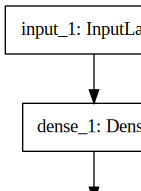

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Treinamento

In [8]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0442 - val_loss: 0.0225
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0172 - val_loss: 0.0128
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0108 - val_loss: 0.0087
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0062 - val_loss: 0.0056


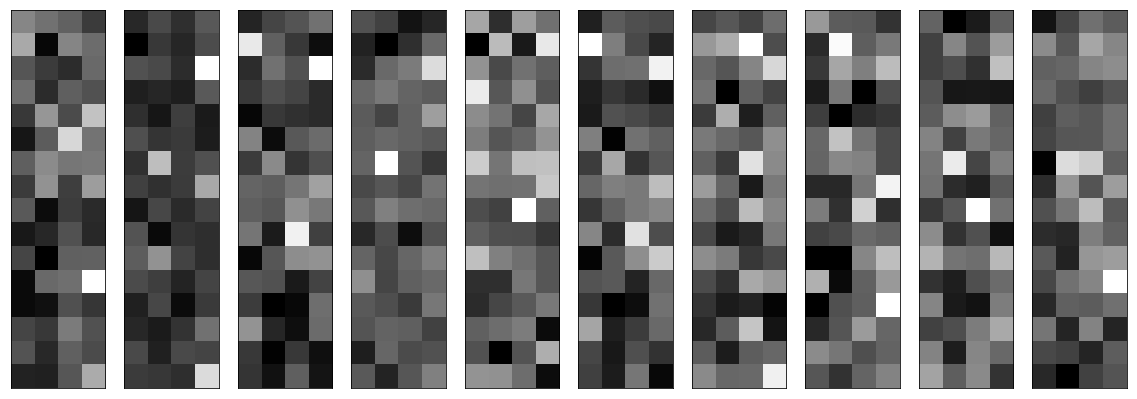

In [9]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Predição no dataset de teste

In [10]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

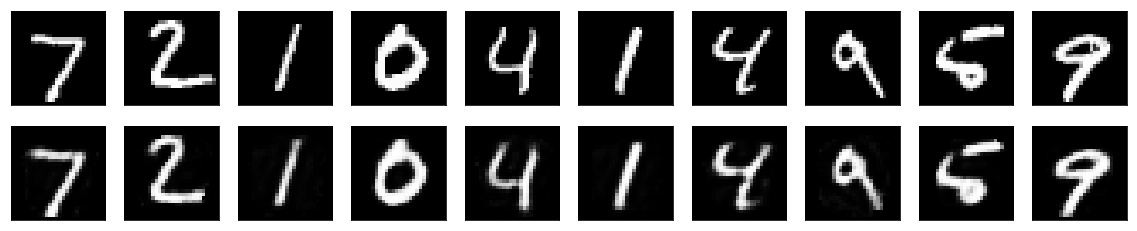

In [11]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # imagens original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # imagens reconstruídas
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plotando as perdas

['loss', 'val_loss']


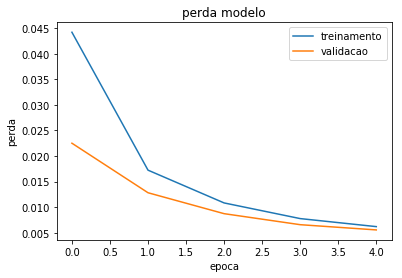

In [12]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('perda modelo')
plt.ylabel('perda')
plt.xlabel('epoca')
plt.legend(['treinamento', 'validacao'], loc='upper right')
plt.show()